In [1]:
%%HTML
<style>.container { width:100% !important; }</style>

# Perceptron

Frank Rosenblatt 1957. Artifical "neuron" - building unit of neural networks. Single perceptron can learn linear function.

![neuron](https://harishnarayanan.org/images/writing/artistic-style-transfer/neuron.gif)

```
#X: input vector
#W: weight vector
#b: scalar bias
#dot: vectors dot product (scalar product)
#activate: https://en.wikipedia.org/wiki/Activation_function

out = activate(dot(X, W) + b)
```

![linear](https://upload.wikimedia.org/wikipedia/commons/b/b8/Linear-function-1.png)

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

# Learning.

Tuning weights and bias to provide desired mapping between input and output.

![sample](http://cmp.felk.cvut.cz/cmp/courses/recognition/Labs/perceptron/images/linear.png)

### Algorithm
- init weights by small random numbers
- calculate output
- calculate prediction error
- update weights and bias to minimize the error

# Stochastic gradient descent (SGD)

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

- define prediction function
- define loss (or cost) function
- obtain partial derivative of loss function to calculate gradient
- define leaning rate value (width of step)
- iterative update weights
    1. calculate prediction
    2. calculate loss
    3. calculate gradient
    4. update weights $w = w - \nabla loss(w) * LearningRate$
    5. loop until get desired loss

![sgd](https://qph.fs.quoracdn.net/main-qimg-25913bb0aa0193a5885640a64e8d490f)

**Problem:**

![local_minimum](https://davidmatablog.files.wordpress.com/2017/08/multidmensional.png?w=550)

[ 0.77861128  0.09069207 -0.02442416]
[0 0]: 0
[0 1]: 1
[1 0]: 1
[1 1]: 1


Text(0,0.5,'Error')

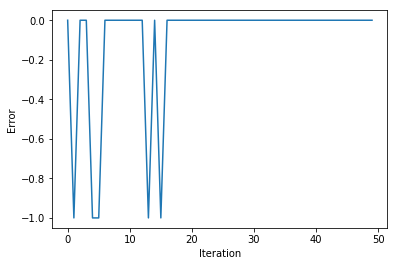

In [71]:
import matplotlib.pyplot as plt
from random import choice
from numpy import array, dot, random

#activation function
heaviside = lambda x: 0 if x < 0 else 1

#prediction function
predict = lambda w, x: heaviside(dot(w, x))

#loss function
loss = lambda y, p: y - p

#derivate loss function
d_loss = lambda x, error: - x * error

#learning rate
learning_rate = 0.2
#iterations count
n = 50
#init weights, w[2] will be a bias
w = random.rand(3)
#to keep errors history
errors = []

#Train perceptron to do logical "OR"

#dataset, third number is a bias coefficient and must be 1
training_data = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 1),
]

for i in range(n):
    x, y = choice(training_data)
    p = predict(w, x)
    error = loss(y, p)
    errors.append(error)
    w -= learning_rate * d_loss(x, error)

print(w)

for x, _ in training_data:
    result = predict(x, w)
    print("{}: {}".format(x[:2], result))

plt.plot(range(n), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')

# Batch and mini-batch gradinet descent
Stochastic gradient descent use single sample from traning set per each iteration. Slow.

Batch gradient descent calculates average error using whole training set at once on each iteration and then update weights. The best if you have enough computational power for particular dataset.

Mini-batch on each iteration gets randomly shuffled slice of training set. The best in most cases.

# Multilayer perceptron

![mlp](https://www.researchgate.net/profile/Svetlana_Ibric2/publication/230735806/figure/fig1/AS:213418930905088@1427894446823/Schematic-drawing-of-multilayer-perceptron-neural-networks-16.png)

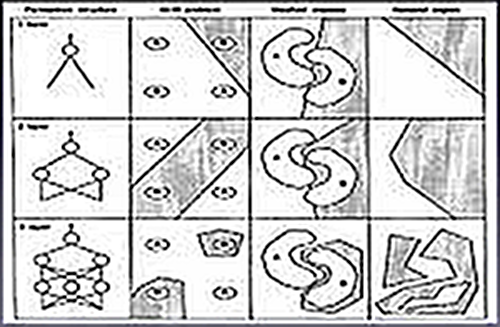

# Learning. Backpropagation algorithm

Propagate an error back to previous layers.

https://ru.coursera.org/learn/machine-learning/lecture/1z9WW/backpropagation-algorithm

https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

[Various gradient descent optimizations](http://ruder.io/optimizing-gradient-descent/)

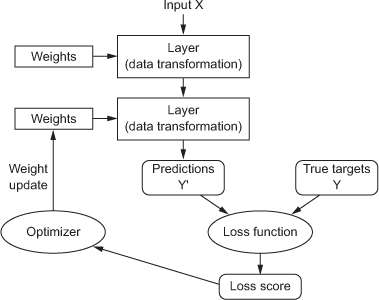

https://www.youtube.com/watch?v=GlcnxUlrtek

# Data encoding and preprocessing
NN takes tensor as input. Vectorize labels, subtracting mean and scaling to [0,1] is mandatory to gradient descent.

One hot encoding for day of week [Sunday, Saturday, Friday]:

| Sun | Mon | Tue | Wed | Thu | Fri | Sat |
| --- | --- | --- | --- | --- | --- | --- |
| 1   | 0   |  0  | 0   | 0   | 0   | 0   |
| 0   | 0   |  0  | 0   | 0   | 0   | 1   |
| 0   | 0   |  0  | 0   | 0   | 1   | 0   |

Integer encoding (Sun, Mon, Tue, Wed, Thu, Fri, Sat):

| DayOfWeek |
| --------- |
| 1   |
| 7   |
| 6   |


http://ufldl.stanford.edu/wiki/index.php/Data_Preprocessing

## Classification

Link to [MLP SGD MNIST](MLP SGD mnist.ipynb)

# Deep networks
Classic MLP can not handle many layers (3 and more layers) because of gradients vanishing/exploding. Need some smarter weights initialization, or use smarter neurons, or better optimizer function.

## Autoencoders
**Unsupervised learning**. It learns to reproduce own input. Can be used in clusterizations tasks. Initially used to pretrain deep networks.
![autoencoder](https://www.doc.ic.ac.uk/~js4416/163/website/img/autoencoders/autoencoder.png)

https://www.quora.com/How-is-deep-learning-different-from-multilayer-perceptron